In [1]:
import os
import sys
import math
import time
import datetime
import numpy as np
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torchvision.utils
import torch.nn.functional as F
import torchvision.transforms as transforms
import torchvision.datasets as dset
import pycocotools.coco as COCO
from tqdm.auto import tqdm

In [2]:
root_path = './River-Evaluation'
pred_path = root_path + '/papua_imgs/pred_img'
img_path = root_path + '/papua_imgs/img'
merge_path = root_path + '/papua_imgs/merge_img'

sys.path.append(root_path)

from util_data import *
from model_base import *
from engine import *

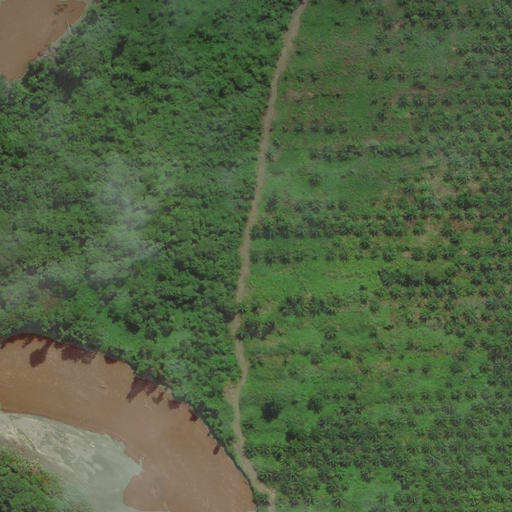

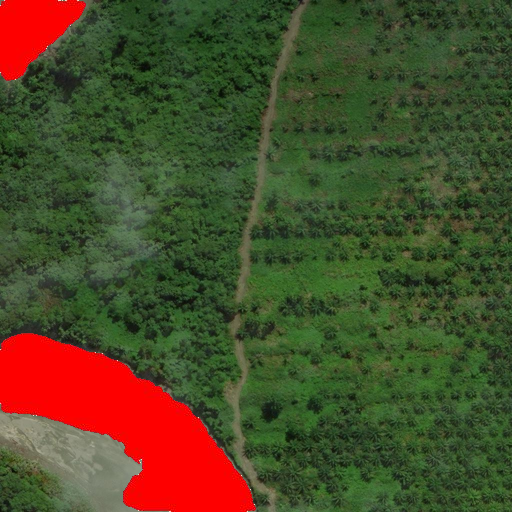

In [3]:
img = Image.open(img_path + '/123904_8192.jpeg').convert("RGB")
img = img.resize((512, 512))
pred = Image.open(pred_path + '/123904_8192.jpeg')

blend = Image.blend(img, pred, 0.1)
blend.show()

img = np.array(img, dtype = np.int32)
pred = np.array(pred, dtype = np.int32)
gabung = np.zeros(img.shape)
comp = np.array([195, 195, 195], dtype = np.int32)
for i in range(img.shape[0]):
    for j in  range(img.shape[1]):
        if (pred[i, j] > comp).all():
            gabung[i, j] = img[i, j]
        else :
            gabung[i, j] = pred[i, j]

gabung = np.uint8(gabung)
Image.fromarray(gabung, mode = 'RGB').show()

In [7]:
from os import listdir
from os.path import isfile, join
onlyfiles = [f for f in listdir(img_path) if isfile(join(img_path, f))]

for img_name in onlyfiles:
    save_path = os.path.join(merge_path, img_name)
    if os.path.exists(save_path):
        continue
    else:
        img = Image.open(os.path.join(img_path, img_name)).convert("RGB")
        img = img.resize((512, 512))
        pred = Image.open(os.path.join(pred_path, img_name))

        img = np.array(img, dtype = np.int32)
        pred = np.array(pred, dtype = np.int32)
        gabung = np.zeros(img.shape)
        comp = np.array([195, 195, 195], dtype = np.int32)
        
        for i in range(img.shape[0]):
            for j in  range(img.shape[1]):
                if (pred[i, j] > comp).all():
                    gabung[i, j] = img[i, j]
                else :
                    gabung[i, j] = pred[i, j]
    
        gabung = np.uint8(gabung)
        merged_img = Image.fromarray(gabung, mode = 'RGB')
        merged_img = merged_img.save(f"{merge_path}/{img_name}")
        
print("finished")

finished
